In [1]:
import zipline
from zipline.api import order, record, symbol
import pandas as pd


def initialize(context):
    pass

def handle_data(context, data):
    order(symbol('AAPL'), 1)
    record(AAPL=data.current(symbol('AAPL'), 'price'))

df = pd.read_csv('AAPL.csv',index_col=['Date'])
df.index = pd.to_datetime(df.index)
data = df[['Adj Close']]
data.columns = ['AAPL']
data = data.tz_localize('UTC')

# 실행
result = zipline.run_algorithm(start=data.index[0], end=data.index[-1], initialize=initialize, capital_base=1000,
                               handle_data=handle_data, data=data)

import matplotlib.pyplot as plt
ax1 = plt.subplot(211)
result.portfolio_value.plot(ax=ax1)
ax1.set_ylabel('Portfolio Value')
ax2 = plt.subplot(212, sharex=ax1)
result.AAPL.plot(ax=ax2)
ax2.set_ylabel('AAPL Stock Price')
#
# import pyfolio as pf
# backtest_df = result.copy()
# returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(backtest_df)
#
# # pf.create_returns_tear_sheet(result['returns'])
# pf.create_full_tear_sheet(returns=returns.fillna(0), positions=positions,
#                           transactions=transactions,
#                           benchmark_rets=None)

Text(0, 0.5, 'AAPL Stock Price')

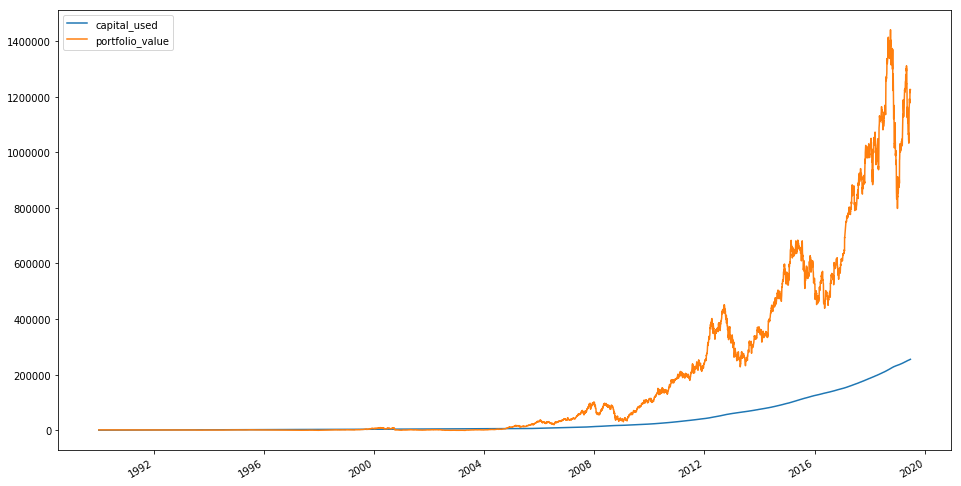

In [16]:
result['capital_used'] = abs(result['capital_used']).cumsum()
result[['capital_used','portfolio_value']].plot(figsize=(16,9))

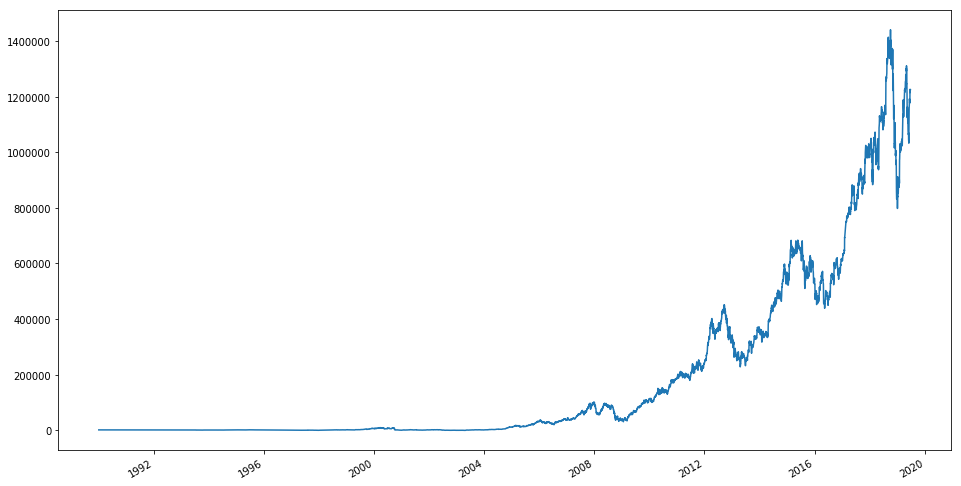

In [4]:
result.portfolio_value.plot(figsize=(16,9))

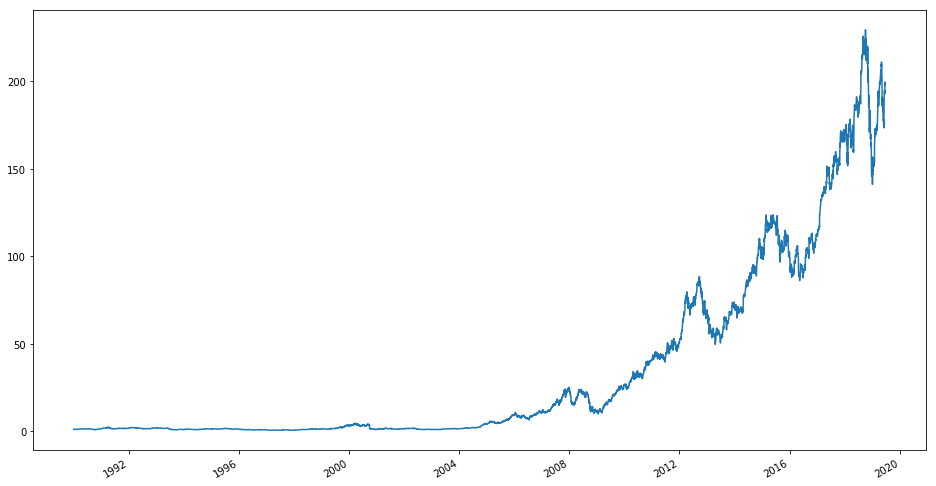

In [5]:
result.AAPL.plot(figsize=(16,9))

In [7]:
result.to_csv('aapl_result.csv')

In [ ]:
! zipline run --help

In [ ]:
! zipline -s 2016-1-1 -e 2018-1-1

In [20]:
import zipline
%%zipline
from zipline.api import symbol, order, record

def initialize(context):
    pass

def handle_data(context, data):
    order(symbol('AAPL'), 10)
    record(AAPL=data[symbol('AAPL')].price)

UsageError: Line magic function `%%zipline` not found.


In [19]:
_.head()

AttributeError: 'str' object has no attribute 'head'

In [21]:
%%zipline --start 2014-1-1 --end 2018-1-1 -o dma.pickle


from zipline.api import order_target, record, symbol
import matplotlib.pyplot as plt

def initialize(context):
    context.i = 0
    context.asset = symbol('AAPL')


def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < 300:
        return

    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price', bar_count=100, frequency="1d").mean()
    long_mavg = data.history(context.asset, 'price', bar_count=300, frequency="1d").mean()

    # Trading logic
    if short_mavg > long_mavg:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(context.asset, 100)
    elif short_mavg < long_mavg:
        order_target(context.asset, 0)

    # Save values for later inspection
    record(AAPL=data.current(context.asset, 'price'),
           short_mavg=short_mavg,
           long_mavg=long_mavg)


def analyze(context, perf):
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value in $')

    ax2 = fig.add_subplot(212)
    perf['AAPL'].plot(ax=ax2)
    perf[['short_mavg', 'long_mavg']].plot(ax=ax2)

    perf_trans = perf.ix[[t != [] for t in perf.transactions]]
    buys = perf_trans.ix[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.ix[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax2.plot(buys.index, perf.short_mavg.ix[buys.index],
             '^', markersize=10, color='m')
    ax2.plot(sells.index, perf.short_mavg.ix[sells.index],
             'v', markersize=10, color='k')
    ax2.set_ylabel('price in $')
    plt.legend(loc=0)
    plt.show()

UsageError: Cell magic `%%zipline` not found.


In [7]:
import sys, json
struct = {}
try: #try parsing to dict
    dataform = str(struct).strip("'<>() ").replace('\'', '\"')
    struct = json.loads(dataform)
except:
    print(repr(struct))
    print(sys.exc_info())

In [1]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
from zipline.api import order, symbol
from zipline.algorithm import TradingAlgorithm

In [2]:
# data
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2016, 3, 19)
data = web.DataReader("AAPL", "yahoo", start, end)

In [3]:
data = data[['Adj Close']]
data.columns = ['AAPL']
data = data.tz_localize('UTC')

In [ ]:
data

In [4]:
def initialize(context):
    pass

def handle_data(context, data):
    order(symbol('AAPL'), 1)

In [5]:
algo = TradingAlgorithm(initialize=initialize, handle_data=handle_data)

C:\Users\HIT-2233\Anaconda3\envs\py36\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [8]:
import json
x = json.loads("")

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [10]:
import json

if json_string:
    x = json.loads(json_string)
else:
    x = {}

NameError: name 'json_string' is not defined

In [ ]:
result = algo.run(data)

plt.plot(result.index, result.portfolio_value)
plt.show()

In [ ]:
from zipline.api import order, record, symbol, set_benchmark
import zipline
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
from collections import OrderedDict
import pytz

In [9]:
full_file_path = "SPY.csv"
data = OrderedDict()
data['SPY'] = pd.read_csv(full_file_path, index_col=0, parse_dates=['date'])
data['SPY'] = data['SPY'][["open","high","low","close","volume"]]
print(data['SPY'].head())

               open     high      low    close   volume
date                                                   
1993-01-29  43.9687  43.9687  43.7500  43.9375  1003200
1993-02-01  43.9687  44.2500  43.9687  44.2500   480500
1993-02-02  44.2187  44.3750  44.1250  44.3437   201300
1993-02-03  44.4062  44.8437  44.3750  44.8125   529400
1993-02-04  44.9687  45.0937  44.4687  45.0000   531500


In [10]:
panel = pd.Panel(data)
panel.minor_axis = ['open','high','low','close','volume']
panel.major_axis = panel.major_axis.tz_localize(pytz.utc) # 2018-01-02 -> 2018-01-02 00:00:00+00:00
print(panel)

<class 'pandas.core.panel.Panel'>
Dimensions: 1 (items) x 6329 (major_axis) x 5 (minor_axis)
Items axis: SPY to SPY
Major_axis axis: 1993-01-29 00:00:00+00:00 to 2018-03-16 00:00:00+00:00
Minor_axis axis: open to volume


In [11]:
panel

<class 'pandas.core.panel.Panel'>
Dimensions: 1 (items) x 6329 (major_axis) x 5 (minor_axis)
Items axis: SPY to SPY
Major_axis axis: 1993-01-29 00:00:00+00:00 to 2018-03-16 00:00:00+00:00
Minor_axis axis: open to volume

In [12]:
def initialize(context):
    set_benchmark(symbol("SPY"))

In [13]:
def handle_data(context, data):
    order(symbol("SPY"), 10)
    record(SPY=data.current(symbol('SPY'), 'price'))

In [ ]:
# 날짜 유의
perf = zipline.run_algorithm(start=datetime(2017, 1, 5, 0, 0, 0, 0, pytz.utc),
                      end=datetime(2018, 3, 1, 0, 0, 0, 0, pytz.utc),
                      initialize=initialize,
                      capital_base=100000,  # 기초자산 설정
                      handle_data=handle_data,
                      data=panel)

In [15]:
handle_data

<function __main__.handle_data(context, data)>

In [16]:
algo = TradingAlgorithm(initialize=initialize, handle_data=handle_data)
result = algo.run(data)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [1]:
import zipline

In [2]:
from zipline.api import order_target, record, symbol

def initialize(context):
    context.i = 0
    context.asset = symbol('AAPL')


def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < 300:
        return

    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price', bar_count=100, frequency="1d").mean()
    long_mavg = data.history(context.asset, 'price', bar_count=300, frequency="1d").mean()

    # Trading logic
    if short_mavg > long_mavg:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(context.asset, 100)
    elif short_mavg < long_mavg:
        order_target(context.asset, 0)

    # Save values for later inspection
    record(AAPL=data.current(context.asset, 'price'),
           short_mavg=short_mavg,
           long_mavg=long_mavg)

In [3]:

%matplotlib inline
%load_ext zipline

In [18]:
%%zipline --start=2011-1-1 --end=2013-1-1

from zipline.api import order, record, symbol
import matplotlib.pyplot as plt

def initialize(context):
    pass

def handle_data(context, data):
    order(symbol('AAPL'), 10)
    record(AAPL=data[symbol('AAPL')].price)
    
def analyze(context, perf):
    ax1 = plt.subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax2 = plt.subplot(212, sharex=ax1)
    perf.AAPL.plot(ax=ax2)
    plt.gcf().set_size_inches(18, 8)
    plt.show()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [6]:
from zipline.algorithm import TradingAlgorithm

In [ ]:
algo = TradingAlgorithm(initialize=initialize, handle_data=handle_data)
result = algo.run(data)